# Анализ датасета Facebook
## Описание Facebook metrics Data Set:
#### (ссылка: https://archive.ics.uci.edu/ml/datasets/Facebook+metrics)

Данные связаны с публикациями, опубликованными в течение 2014 года на странице известного косметического бренда в Facebook. 
Этот набор данных содержит 500 строк объектов и 19 атрибутов. 
Из них 7 фич, известных до публикации поста, и 12 фич для оценки показателей поста
Пропущенные значения имеют вид NaN

## ХАРАКТЕРИСТИКИ(пояснения):
__Page total likes__: число людей, лайкавших страницу
<br>__Type__: тип контента Link(ссылка), Photo(фото), Status(статус), Video(видео).
<br>__Category__: 1-action(акция), 2-product(товар), 3-inspiration(неявная связь с брендом)
<br>__Post Month__: месяц публикации(1-Январь...12-Декабрь)
<br>__Post Weekday__: неделя публикации (1-Sunday,7-Saturday)
<br>__Post Hour__: час публикации(0-23)
<br>__Paid__: если компания платила Facebook за рекламу (0-нет, 1-да)
<br>__Lifetime Post Total Reach__: число людей, которые видели публикацию (уникальные пользователи).
<br>__Lifetime Post Total Impressions__: показы - это число раз, когда отображается сообщение со страницы, независимо от того, щелкнуто оно или нет. Люди могут видеть несколько показов одного и того же сообщения. Например, кто-то может увидеть обновление страницы в Ленте Новостей один раз, а затем второй раз, если друг делится им.
<br>__Lifetime Engaged Users__: число людей, щелкнувших в любом месте поста (уникальные пользователи).
<br>__Lifetime Post Consumers__: число людей, щелкнувших в любом месте поста.
<br>__Lifetime Post Consumptions__: число кликов в любом месте поста.
<br>__Lifetime Post Impressions by people who have liked a Page__: общее число показов поста только людям, которые лайкали страницу.
<br>__Lifetime Post reach by people who like a Page__: число людей, которые видели пост, потому что они лайкали эту страницу (уникальные пользователи).
<br>__Lifetime People who have liked a Page and engaged with a post__: число людей, которые лайкали страницу и которые нажали в любом месте поста (уникальные пользователи).
<br>__comment__: число комментариев
<br>__like__: число лайков
<br>__share__: число людей, поделившихся записью
<br>__Total Interactions__: 'comment'+'like'+'share' - всего взаимодейтсвий

In [200]:
import pandas as pd
import numpy as np
from IPython.display import HTML, display
import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

data=pd.read_csv('C:/Users/kotsi/Downloads/dataset_Facebook.csv', sep=';')
data['Paid'] = data.Paid.astype('bool')
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,False,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,False,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,False,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,True,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,False,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [201]:
# Для этих стобцов нам бесполезно считать среднее, максимальное и минимальное
categorical_columns=data[['Type','Category','Post Month', 'Post Weekday', 'Post Hour', 'Paid']] #мода, медиана

numerical_columns=data.drop(['Category', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid'], axis=1)

def static_counted(columns):
    measures=dict()
    measures['0_mean']=columns.mean()
    measures['1_max']=columns.max()
    measures['2_min']=columns.min()
    measures['3_median']=columns.median()
    measures=pd.DataFrame(measures).T
    return measures

In [202]:
# Мода
categorical_columns.mode()

,Type,Category,Post Month,Post Weekday,Post Hour,Paid
0,Photo,1,10,7,3,False


In [203]:
static_counted(numerical_columns)

,Lifetime Engaged Users,Lifetime People who have liked your Page and engaged with your post,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post Total Impressions,Lifetime Post Total Reach,Lifetime Post reach by people who like your Page,Page total likes,Total Interactions,Type,comment,like,share
0_mean,920.344,609.986,798.772,1415.13,16766.4,29585.9,13903.4,6585.49,123194,212.12,NaN,7.482,177.946,27.2661
1_max,11452,4376,11328,19779,1107833,1110282,180480,51456,139441,6334,Video,372,5172,790
2_min,9,9,9,9,567,570,238,236,81370,0,Link,0,0,0
3_median,625.5,412,551.5,851,6255.5,9051,5281,3417,129600,123.5,NaN,3,101,19


In [204]:
numerical_columns.mode().T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Page total likes,136393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,Photo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifetime Post Total Reach,677,2232,2645,2938,3322,3358,3414,3528,3754,5280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifetime Post Total Impressions,4372,6503,7004,8533,8745,12735,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifetime Engaged Users,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifetime Post Consumers,182,298,319,322,335,374,482,503,513,642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifetime Post Consumptions,431,513,599,652,719,730,795,889,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifetime Post Impressions by people who have liked your Page,1210,1284,2541,2888,3675,4911,4935,5010,5732,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifetime Post reach by people who like your Page,690,704,1228,1640,1674,1722,2044,2124,2162,2174,...,3230,3298,3768,5348,5372,7020,7800,8032,8120,20608
Lifetime People who have liked your Page and engaged with your post,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
types=list(data['Type'].unique())
types

['Photo', 'Status', 'Link', 'Video']

In [206]:
un_photos=categorical_columns.drop(np.where(categorical_columns['Type']!='Photo')[0])
photos=numerical_columns.drop(np.where(numerical_columns['Type']!='Photo')[0])
un_statuses=categorical_columns.drop(np.where(categorical_columns['Type']!='Status')[0])
statuses=numerical_columns.drop(np.where(numerical_columns['Type']!='Status')[0])
un_linkes=categorical_columns.drop(np.where(categorical_columns['Type']!='Link')[0])
linkes=numerical_columns.drop(np.where(numerical_columns['Type']!='Link')[0])
un_videos=categorical_columns.drop(np.where(categorical_columns['Type']!='Video')[0])
videos=numerical_columns.drop(np.where(numerical_columns['Type']!='Video')[0])

un_arr=[un_photos, un_statuses, un_linkes, un_videos]
arr=[photos, statuses, linkes, videos]

In [207]:
for i in un_arr:
    print(i['Type'].unique())
    display(HTML(tabulate.tabulate(i.mode(), tablefmt='html', headers=categorical_columns.columns.values[1:])))

['Photo']


,,Category,Post Month,Post Weekday,Post Hour,Paid
0,Photo,1,10,7,3,False


['Status']


,,Category,Post Month,Post Weekday,Post Hour,Paid
0,Status,2,12,5,10,0
1,nan,nan,nan,7,nan,nan


['Link']


,,Category,Post Month,Post Weekday,Post Hour,Paid
0,Link,1,12,6,3,False


['Video']


,,Category,Post Month,Post Weekday,Post Hour,Paid
0,Video,1,11,2,11,1
1,nan,nan,nan,3,nan,nan


In [208]:
for i in arr:
    print(i['Type'].unique())
    display(HTML(tabulate.tabulate(static_counted(i.drop(["Type"], axis=1)), tablefmt='html', headers=numerical_columns.drop(["Type"], axis=1).columns.values[:])))

['Photo']


,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0_mean,122354,13137.8,28994.5,818.946,690.432,1299.03,16422.5,6059.1,507.305,7.49296,182.612,27.1588,216.58
1_max,139441,180480,1.11028e+06,11452,11328,19779,1.10783e+06,51456,3430,372,5172,790,6334
2_min,81370,238,570,9,9,9,567,236,9,0,0,0,0
3_median,128032,4675,8118.5,605.5,528.5,827,5498,3110,403,3,100,19,122


['Status']


,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0_mean,132647,13078.9,24244.5,2040.22,1949.56,2838.87,18664.3,9908.58,1719.84,8.91111,176.711,31.4222,217.044
1_max,139441,31136,59964,6164,5934,9237,37849,21352,4376,60,859,123,1009
2_min,104070,3930,7509,128,86,112,5009,2410,101,0,13,1,17
3_median,135713,11096,20849,1701,1599,2201,17502,8980,1604,4,150,28,186


['Link']


,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0_mean,116363,18544.6,28725.5,342.818,292.682,374.091,11148.6,6544.36,210.545,2.81818,73.3182,12.9091,89.0455
1_max,138895,70912,229733,1374,1106,1345,42338,27232,788,15,379,44,420
2_min,85979,1536,3094,24,23,26,2307,1180,19,0,5,0,6
3_median,115396,7422,9773,244,205,290,9034.5,5039,161.5,1.5,37,10.5,52.5


['Video']


,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0_mean,135015,51205.7,102622,1707,1584.71,2600.14,43149.9,17386.3,979.429,12.2857,231.429,52.1429,295.857
1_max,138895,139008,277100,3872,3822,7327,107502,38720,2218,23,449,121,550
2_min,126424,13544,30235,459,411,539,21436,9568,363,2,65,13,81
3_median,137893,30624,56950,1779,1643,2331,30131,14112,885,17,204,44,271


In [209]:
for i in arr:
    print(i['Type'].unique())
    display(HTML(tabulate.tabulate(i.drop(["Type"], axis=1).mode(), tablefmt='html', headers=numerical_columns.drop(["Type"], axis=1).columns.values)))

['Photo']


,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,124940,677,4372,537,298,431,1210,690,403,0,7,14,0
1,nan,2232,6503,nan,319,513,1284,704,nan,nan,79,nan,39
2,nan,2938,7004,nan,335,599,2541,1228,nan,nan,98,nan,nan
3,nan,3322,8533,nan,374,652,2888,1640,nan,nan,nan,nan,nan
4,nan,3358,8745,nan,482,719,3675,1674,nan,nan,nan,nan,nan
5,nan,3414,12735,nan,503,730,4911,1722,nan,nan,nan,nan,nan
6,nan,3528,nan,nan,513,795,4935,2044,nan,nan,nan,nan,nan
7,nan,3754,nan,nan,642,889,5010,2124,nan,nan,nan,nan,nan
8,nan,5280,nan,nan,nan,nan,5732,2162,nan,nan,nan,nan,nan
9,nan,5290,nan,nan,nan,nan,nan,2174,nan,nan,nan,nan,nan


['Status']


,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,3930,7509,128,86,1692,5009,2410,101,2,86,1,117
1,nan,6692,13092,130,108,nan,7549,3336,123,4,99,13,121
2,nan,8260,14305,135,119,nan,9562,5180,126,nan,129,18,nan
3,nan,8284,14759,199,126,nan,9684,5244,156,nan,227,36,nan
4,nan,8488,14847,304,286,nan,10266,5372,291,nan,nan,nan,nan
5,nan,8628,15104,870,843,nan,11710,6112,740,nan,nan,nan,nan
6,nan,8728,15294,908,847,nan,11970,6796,774,nan,nan,nan,nan
7,nan,8896,16054,951,861,nan,12905,7020,843,nan,nan,nan,nan
8,nan,9056,16362,997,937,nan,12996,7092,924,nan,nan,nan,nan
9,nan,9120,16811,1006,953,nan,13246,7200,956,nan,nan,nan,nan


['Link']


,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,138353,1536,3094,66,322,26,2307,1180,19,0,12,2,14
1,nan,1925,3481,nan,nan,70,2330,1377,58,nan,32,nan,nan
2,nan,2645,4270,nan,nan,71,2903,1407,59,nan,nan,nan,nan
3,nan,2933,5144,nan,nan,97,3972,2012,76,nan,nan,nan,nan
4,nan,3454,5808,nan,nan,99,4263,2138,77,nan,nan,nan,nan
5,nan,3616,6853,nan,nan,118,6282,3100,92,nan,nan,nan,nan
6,nan,4664,6887,nan,nan,126,6625,3324,93,nan,nan,nan,nan
7,nan,4938,7910,nan,nan,130,6734,3492,101,nan,nan,nan,nan
8,nan,5168,7927,nan,nan,170,7041,3804,106,nan,nan,nan,nan
9,nan,5730,8371,nan,nan,223,7196,3996,138,nan,nan,nan,nan


['Video']


,Page total likes,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,137893,13544,30235,459,411,539,21436,9568,363,2,65,13,81
1,nan,16416,31950,517,458,667,24667,11760,447,18,99,nan,114
2,nan,21872,40413,1141,1068,1728,26622,12920,559,nan,143,nan,174
3,nan,30624,56950,1779,1643,2331,30131,14112,885,nan,204,nan,271
4,nan,36208,61262,2080,1735,2356,32033,15744,1008,nan,315,nan,409
5,nan,100768,220447,2101,1956,3253,59658,18880,1376,nan,345,nan,472
6,nan,139008,277100,3872,3822,7327,107502,38720,2218,nan,449,nan,550


### самый популярный объект

## Самый популярный объект в выборке и почему
### 1.Явный вид
#### Если принимать что события "comment", "like", "share" равнозначны для популярности,то можно смотреть только на столбец Total interactions
#### Самый популярным постом можно считать пост 244, который имеет наибольшее число взимодейтсвий

In [210]:
The_best=numerical_columns.drop(['Page total likes','Type','Lifetime Post Impressions by people who have liked your Page','Lifetime Post reach by people who like your Page','Lifetime People who have liked your Page and engaged with your post','comment','like','share'], axis=1)
pd.Series(The_best.max())
data.loc[The_best['Total Interactions']==The_best['Total Interactions'].max()]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
244,130791,Photo,2,7,3,5,True,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334


#### По этим результатам мы также видим, что пост набрал такое больше число "лайков" за счет активного продвижения в рекламе
#### Самым популярным в плане лайков вне зависимости от частоты показов поста является пост 87.
#### Его мы нашли через отношение "Лайков" к числу уникальных человек, у которых пост был виден

In [211]:
data.loc[(The_best['Total Interactions']/The_best['Lifetime Post Total Reach'])==(The_best['Total Interactions']/The_best['Lifetime Post Total Reach']).max()]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
87,137177,Photo,3,11,3,10,False,4012,7955,550,319,477,4625,2218,403,3,270.0,38.0,311


### 2. Неявно
#### Если мерить популярность не по числу видимых другим пользователям метрикам(лайк, коммент, поделились), а по числу взаимодействий(кликов) с постом, то самым популярным является пост 278

In [212]:
data.loc[(The_best['Lifetime Post Consumptions'])==(The_best['Lifetime Post Consumptions']).max()]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
278,126345,Photo,1,6,2,9,True,5854,11854,1043,947,19779,5901,2894,583,11,202.0,5.0,218


#### По числу взаимодействий пользователя со страницей самым популярным постом является пост 422, где на одного увидевшего пост человека приходится около 3,5 кликов

In [213]:
data.loc[(The_best['Lifetime Post Consumptions']/The_best['Lifetime Post Total Reach'])==(The_best['Lifetime Post Consumptions']/The_best['Lifetime Post Total Reach']).max()]

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
422,102112,Photo,1,3,1,19,False,238,570,143,142,834,567,236,99,0,2.0,0.0,2


In [214]:
data=data.drop(data.loc[data['Lifetime Post Consumers']>5000].index)
data=data.dropna()
data.shape

(493, 19)

# Корреляция

In [215]:
print(data.corr()['Lifetime Post Consumers'].abs().sort_values(ascending=False).head(19))

Lifetime Post Consumers                                                1.000000
Lifetime Engaged Users                                                 0.954537
Lifetime People who have liked your Page and engaged with your post    0.917066
Lifetime Post Consumptions                                             0.622288
Lifetime Post reach by people who like your Page                       0.606367
Lifetime Post Total Reach                                              0.495348
share                                                                  0.427001
Total Interactions                                                     0.424432
like                                                                   0.417469
comment                                                                0.391607
Lifetime Post Total Impressions                                        0.362817
Lifetime Post Impressions by people who have liked your Page           0.282010
Post Month                              

In [216]:
data.corr()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
Page total likes,1.000000,-0.089393,0.940863,-0.019351,-0.148719,0.004988,-0.070554,-0.097753,-0.110595,-0.163651,-0.121257,-0.095862,-0.058425,0.023380,0.030709,0.052932,-0.007921,0.045810
Category,-0.089393,1.000000,-0.125625,-0.048798,-0.110165,-0.024383,-0.142337,-0.095664,0.021026,-0.019279,-0.154525,-0.050352,-0.111519,0.016352,0.024747,0.124238,0.148989,0.123657
Post Month,0.940863,-0.125625,1.000000,0.002870,-0.180475,-0.017943,-0.093678,-0.097971,-0.133543,-0.182346,-0.149147,-0.094560,-0.091696,-0.010555,0.003867,0.024327,-0.025345,0.018053
Post Weekday,-0.019351,-0.048798,0.002870,1.000000,0.039976,0.011714,-0.034280,-0.026777,-0.019829,0.006984,0.007010,-0.044684,-0.062013,0.001713,-0.072777,-0.077848,-0.048092,-0.075601
Post Hour,-0.148719,-0.110165,-0.180475,0.039976,1.000000,-0.063387,0.016049,0.017495,0.055332,0.075401,0.123321,0.040058,0.058457,0.060172,0.008160,-0.018635,-0.055476,-0.021598
Paid,0.004988,-0.024383,-0.017943,0.011714,-0.063387,1.000000,0.130787,0.054955,0.081467,0.055354,0.063722,0.000337,0.099824,0.035316,0.065423,0.102031,0.073078,0.098544
Lifetime Post Total Reach,-0.070554,-0.142337,-0.093678,-0.034280,0.016049,0.130787,1.000000,0.696027,0.593866,0.495348,0.284391,0.325916,0.749317,0.415309,0.430563,0.551217,0.462958,0.544303
Lifetime Post Total Impressions,-0.097753,-0.095664,-0.097971,-0.026777,0.017495,0.054955,0.696027,1.000000,0.411010,0.362817,0.222566,0.852010,0.652136,0.340314,0.316134,0.344663,0.287143,0.342689
Lifetime Engaged Users,-0.110595,0.021026,-0.133543,-0.019829,0.055332,0.081467,0.593866,0.411010,1.000000,0.954537,0.581828,0.311560,0.707524,0.916499,0.582843,0.666486,0.633492,0.669846
Lifetime Post Consumers,-0.163651,-0.019279,-0.182346,0.006984,0.075401,0.055354,0.495348,0.362817,0.954537,1.000000,0.622288,0.282010,0.606367,0.917066,0.391607,0.417469,0.427001,0.424432


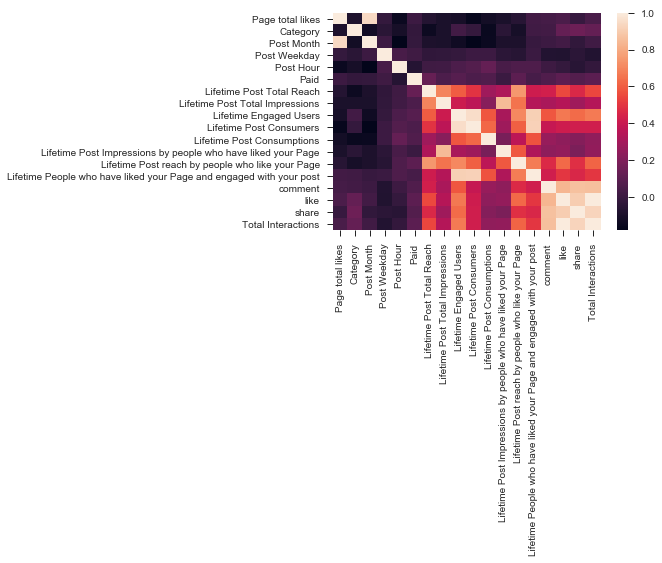

In [217]:
sns.heatmap(data.corr())

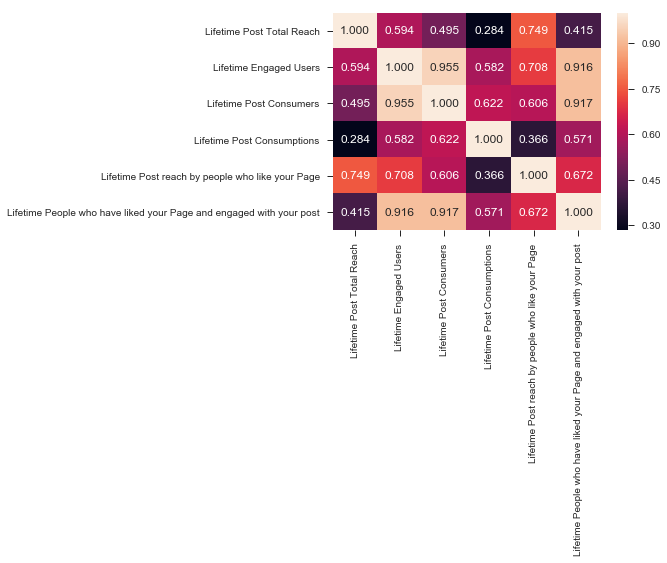

In [218]:
data=data.drop(['Page total likes','Category','Post Month','Post Weekday','Post Hour','Paid','Lifetime Post Total Impressions','Lifetime Post Impressions by people who have liked your Page','comment','like','share','Total Interactions'], axis=1)
sns.heatmap(data.corr(), annot=True, fmt='.3f')

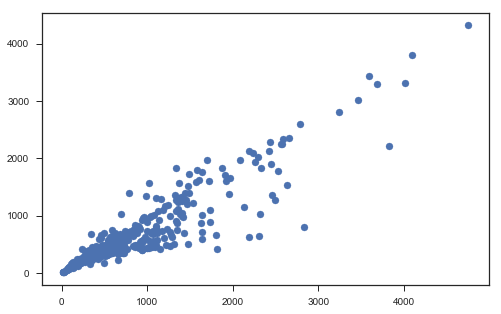

In [219]:
plt.figure(figsize=(8,5))
plt.scatter(data['Lifetime Post Consumers'], data['Lifetime People who have liked your Page and engaged with your post'])

# Гистограмма

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


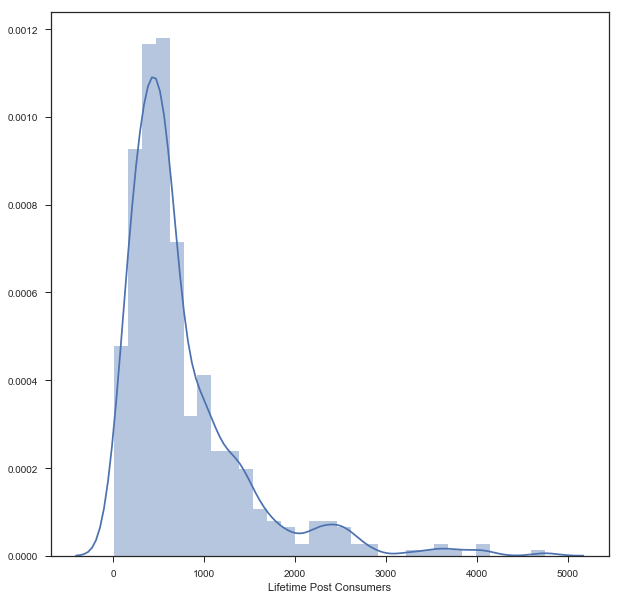

In [220]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Lifetime Post Consumers'])

# Jointplot - комбинация гистограмм и диаграмм рассеивания

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


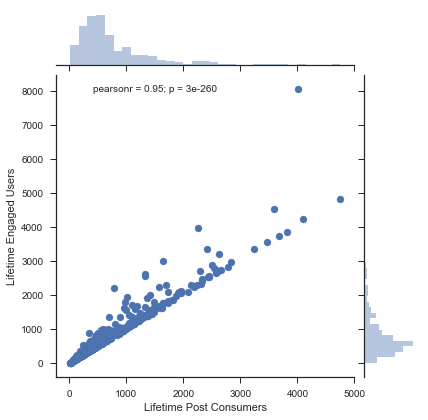

In [221]:
sns.jointplot(x='Lifetime Post Consumers', y='Lifetime Engaged Users', data=data)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


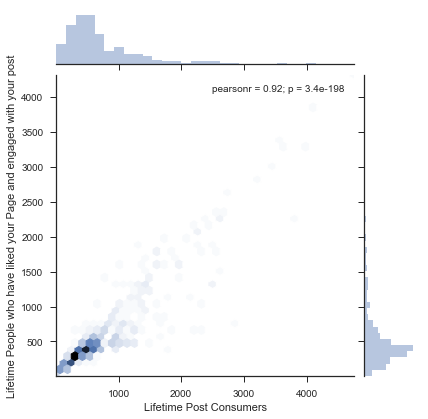

In [222]:
sns.jointplot(x='Lifetime Post Consumers', y='Lifetime People who have liked your Page and engaged with your post', data=data, kind='hex')

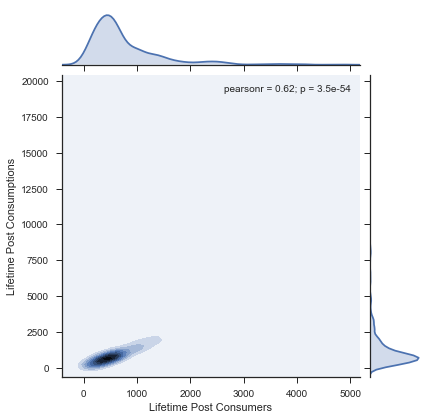

In [223]:
sns.jointplot(x='Lifetime Post Consumers', y='Lifetime Post Consumptions', data=data, kind='kde')

# Парные диаграммы

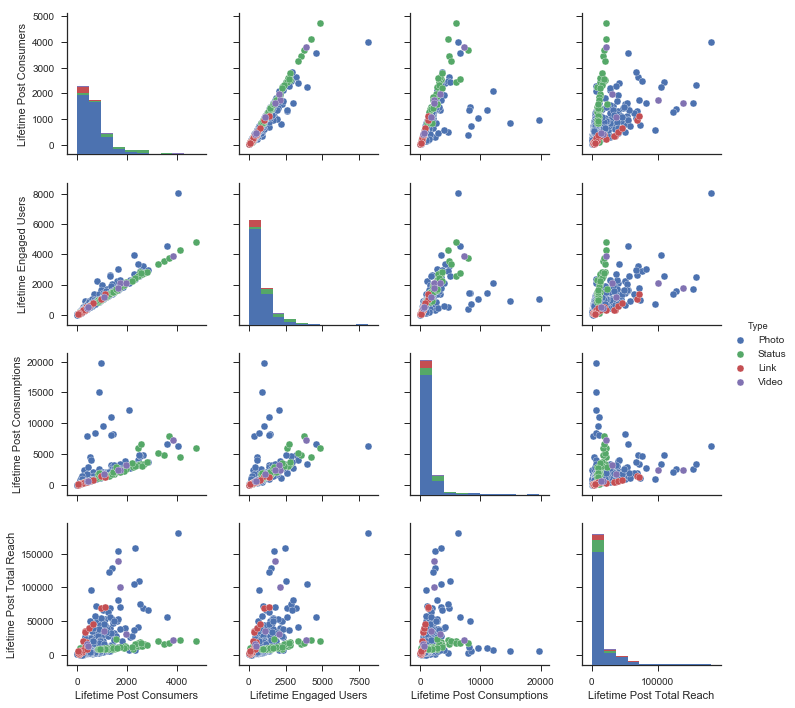

In [224]:
cols = ['Lifetime Post Consumers','Lifetime Engaged Users','Lifetime Post Consumptions','Lifetime Post Total Reach','Type']
sns.pairplot(data[cols], hue='Type')

# Ящик с усами
Отображает одномерное распределение вероятности

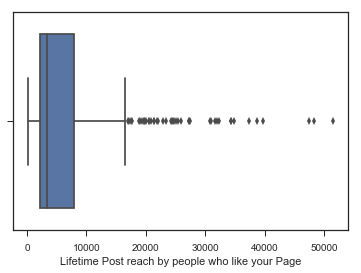

In [225]:
sns.boxplot(x=data['Lifetime Post reach by people who like your Page'])

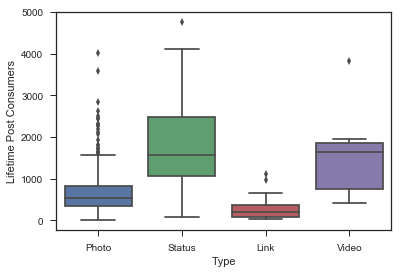

In [226]:
# Распределение параметра Page total likes сгруппированные по Type.
sns.boxplot(x='Type', y='Lifetime Post Consumers', data=data)

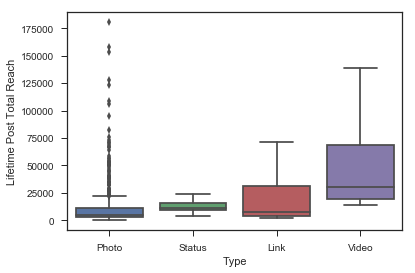

In [227]:
sns.boxplot(x='Type', y='Lifetime Post Total Reach', data=data)

где 1-action(акция), 2-product(товар), 3-inspiration(неявная связь с брендом) 

# Violin plot
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности

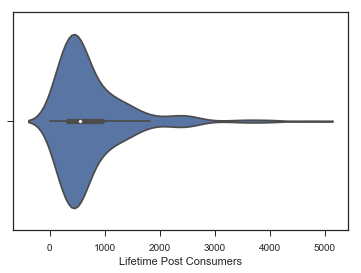

In [228]:
sns.violinplot(x=data['Lifetime Post Consumers'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


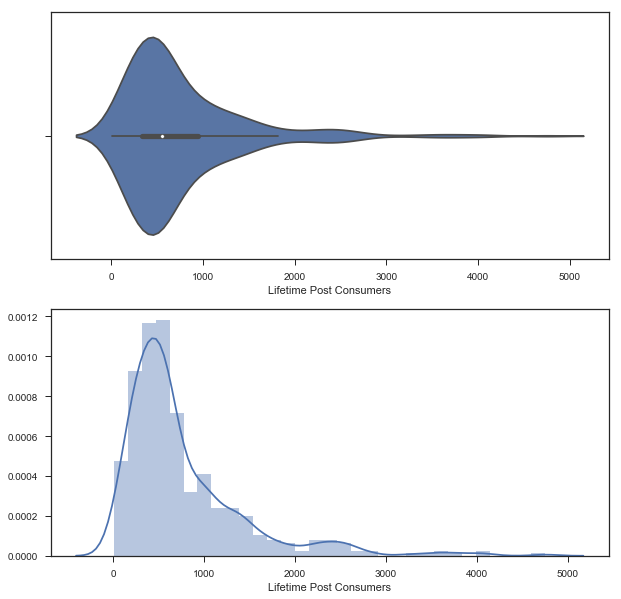

In [231]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Lifetime Post Consumers'])
sns.distplot(data['Lifetime Post Consumers'], ax=ax[1])

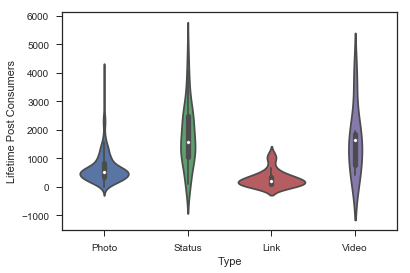

In [232]:
# Распределение параметра Page total likes сгруппированные по Type.
sns.violinplot(x='Type', y='Lifetime Post Consumers', data=data)